In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X,y,index):
 plt.figure(figsize=(10,2))
 plt.imshow(X[index])
 plt.xlabel(classes[y[index]]) 

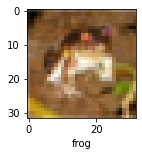

In [10]:
plot_sample(X_train,y_train,0)

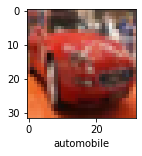

In [11]:
plot_sample(X_train, y_train, 5)

scaling the images

In [16]:
X_train = X_train/255.0
X_test = X_test/255.0

Convolutional Neural Network model

In [17]:
cnn = models.Sequential([
       layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (32,32,3)),
       layers.MaxPooling2D((2,2)),
       layers.Flatten(),
       layers.Dense(64, activation='relu'),
       layers.Dense(10, activation='softmax')           
])

In [18]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4452 - accuracy: 0.4882
Epoch 2/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.1671 - accuracy: 0.5903
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.0518 - accuracy: 0.6344
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.9717 - accuracy: 0.6615
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9109 - accuracy: 0.6833
Epoch 6/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8559 - accuracy: 0.7006
Epoch 7/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8114 - accuracy: 0.7183
Epoch 8/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.7676 - accuracy: 0.7315
Epoch 9/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.7301 - accuracy: 0.7444
Epoch 10/10
1563/1563 [==============================] - 35s 23m

In [22]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 1.1431 - accuracy: 0.6381


[1.1430611610412598, 0.6381000280380249]

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.7982448e-04, 4.1274652e-06, 2.2391388e-03, 5.7109231e-01,
        3.5892444e-04, 3.8388887e-01, 3.9485168e-02, 8.0749953e-05,
        2.6614140e-03, 9.4655752e-06],
       [6.0768954e-05, 1.2036603e-04, 3.5310599e-08, 3.1739877e-08,
        4.7179835e-08, 1.2807508e-10, 2.2650899e-09, 1.2058205e-11,
        9.9981850e-01, 2.0145494e-07],
       [2.9016954e-01, 1.3819885e-02, 1.5165691e-02, 7.4806553e-03,
        7.3263221e-03, 2.3410324e-04, 4.3892392e-04, 2.6071336e-04,
        6.6362345e-01, 1.4806720e-03],
       [1.0723384e-01, 4.0967735e-03, 6.8423167e-02, 4.3647727e-03,
        6.2907124e-01, 8.7758512e-05, 2.5962315e-02, 2.6065709e-05,
        1.6009583e-01, 6.3816400e-04],
       [5.8896727e-05, 2.0745611e-06, 3.8130356e-03, 3.7609611e-02,
        3.2119226e-01, 4.9853302e-03, 6.3233328e-01, 4.6875421e-06,
        4.7542250e-07, 3.7976500e-07]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 4, 6]

In [25]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.60      0.65      1000
           1       0.85      0.67      0.75      1000
           2       0.51      0.53      0.52      1000
           3       0.46      0.47      0.46      1000
           4       0.51      0.70      0.59      1000
           5       0.54      0.55      0.54      1000
           6       0.68      0.76      0.72      1000
           7       0.80      0.59      0.68      1000
           8       0.70      0.80      0.75      1000
           9       0.78      0.71      0.74      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000

